In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import napari
import matplotlib.pyplot as plt 
import numpy as np
from pathlib import Path

from utils import  load_image, select_elipse_from_stack, compute_dff_single_cell
from consts import UMBRELLA, coord_path

In [2]:

rna = "91"
assert rna in {"90", "91", "scrambled"}
well = 5

experiments = list((UMBRELLA / rna / str(well)).glob("*.czi"))

In [3]:
viewer = napari.Viewer()
experiment = experiments[3]
print(experiment)
file_name = f"{rna}_{well}_{experiment.name.strip(".czi")}.npy"
image = load_image(str(experiment))
stack = image.get_image_data().squeeze()

average = stack.mean(axis=0)

# viewer.add_image(stack, name="full stack", scale=(1, 1, 1))
viewer.add_image(average, name="average")

print(stack.shape)

/Volumes/MarcBusche/Amalia/Neuron revisions - DG/dlx-GCaMP siRNA/91/5/Experiment-1401.czi
(123, 1171, 1171)


In [4]:
shapes_layers = [layer for layer in viewer.layers if "Shapes" in layer.name]
coords = [d for layer in shapes_layers for d in layer.data]
if len(coords) >= 1:
    print(f"Got {len(coords)} cells ")
    np.save(coord_path / file_name, coords)

coordys = np.load(coord_path / file_name)

Got 14 cells 


In [5]:
for idx, coord in enumerate(coordys):
    x = select_elipse_from_stack(coord, stack)
    viewer.add_image(x, name=f"elipse {idx}")

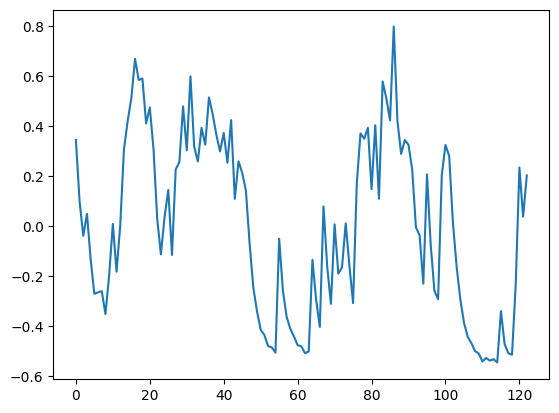

In [6]:
x = np.linspace(0,180,  stack.shape[0])
for idx, coord in enumerate(coordys):
    plt.plot(compute_dff_single_cell(np.nanmean(select_elipse_from_stack(coord, stack), axis=(1, 2))) + idx)
    # break
    # plt.plot(x, np.nanmean(select_elipse_from_stack(coord, stack), axis=(1, 2)))

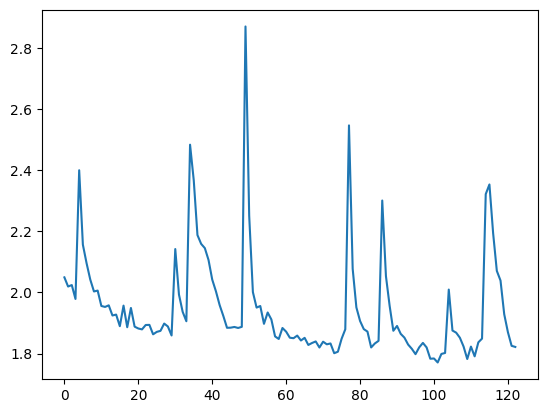

In [7]:
shape = [layer for layer in viewer.layers if layer.name == "Shapes"][0]
assert len(shape.data) == 1
corner_pixels = shape.corner_pixels

top_left =  [corner_pixels[0, 1], corner_pixels[0, 2]]
bottom_right = [corner_pixels[1,1], corner_pixels[1,2]]
cell = stack[:, top_left[0]: bottom_right[0], top_left[1]: bottom_right[1]]

plt.plot(np.mean(cell, axis=(1, 2)))

